Laboratorio No. 3 Modelado y Simulacion Numerica.

Importacion de librerias.

In [101]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

Inicializacion de constantes.

In [102]:
total_eventos = 100
cola = []
lambda_valle = 7
lambda_punta = 1

Generacion de numeros aleatorios exponenciales para llegadas de clientes.

In [103]:
def genera_tiempo_cliente(lam):
    return round(-math.log(random.uniform(0,1))/lam, 2)

Generacion de numeros aleatorios discretos para atencion de operadores.

In [104]:
def generador_operador(op):
    r = random.uniform(0,1)
    if(op==1):
        if(r>=0 and r<0.3):
            output = 2
        elif(r>=0.3 and r<0.5):
            output = 2.5
        elif(r>=0.5 and r<0.75):
            output = 3
        elif(r>=0.75 and r<1):
            output = 4
    if(op==2):
        if(r>=0 and r<0.15):
            output = 2
        elif(r>=0.15 and r<0.30):
            output = 2.5
        elif(r>=0.30 and r<0.70):
            output = 3
        elif(r>=0.70 and r<0.90):
            output = 3.5
        elif(r>=0.90 and r<1):
            output = 4
    return output

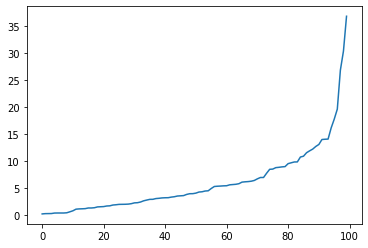

In [105]:
x = []
tiempos_clientes_valle = []
tiempos_clientes_s = []

for i in range(0,total_eventos):
    al = genera_tiempo_cliente(1/lambda_valle)
    tiempos_clientes_s.append(al)
    tiempos_clientes_valle.append(al)
    x.append(i)
tiempos_clientes_s.sort()

plt.plot(x,tiempos_clientes_s)


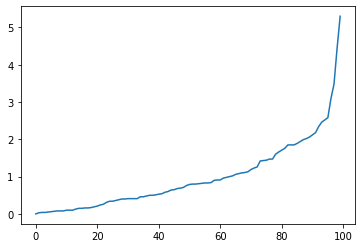

In [106]:
x = []
tiempos_clientes_punta = []
tiempos_clientes_s = []

for i in range(0,total_eventos):
    al = genera_tiempo_cliente(1/lambda_punta)
    tiempos_clientes_s.append(al)
    tiempos_clientes_punta.append(al)
    x.append(i)
tiempos_clientes_s.sort()
plt.plot(x,tiempos_clientes_s)

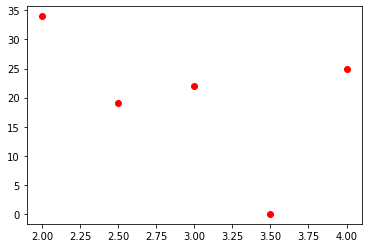

In [107]:
tiempos_operador_1 = []
for i in range(0,total_eventos):
    tiempos_operador_1.append(generador_operador(1))

Elements = Counter(tiempos_operador_1)
plt.plot([2,2.5,3,3.5,4],[Elements[2],Elements[2.5],Elements[3],Elements[3.5],Elements[4]], 'ro')

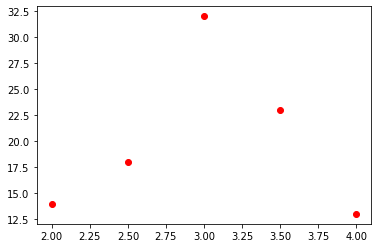

In [108]:
tiempos_operador_2 = []
for i in range(0,total_eventos):
    tiempos_operador_2.append(generador_operador(2))

Elements = Counter(tiempos_operador_2)
plt.plot([2,2.5,3,3.5,4],[Elements[2],Elements[2.5],Elements[3],Elements[3.5],Elements[4]], 'ro')

Script para generacion de vector con tiempos aleatorios sumados posicion a posicion.

In [109]:
temp = 0
tiempo_llegada_clientes = []
for i in range(0,total_eventos):
    temp = temp + tiempos_clientes_valle[i] 
    tiempo_llegada_clientes.append(round(temp,2))
print(tiempo_llegada_clientes)

[4.27, 6.08, 9.86, 13.77, 23.42, 25.08, 39.1, 41.97, 42.18, 53.05, 69.17, 70.21, 75.54, 85.35, 94.16, 96.37, 106.17, 108.76, 112.11, 129.86, 133.78, 138.19, 139.82, 141.76, 150.7, 156.26, 168.45, 176.93, 178.91, 182.04, 186.49, 186.65, 190.67, 191.0, 199.89, 202.62, 222.23, 231.72, 232.09, 235.26, 242.18, 256.23, 256.46, 258.52, 261.68, 270.43, 300.82, 307.49, 312.74, 349.59, 362.27, 363.73, 364.87, 369.75, 370.08, 370.3, 378.01, 383.62, 389.85, 416.7, 423.62, 429.28, 443.25, 446.73, 448.68, 449.01, 449.33, 457.77, 458.51, 464.67, 470.73, 473.59, 474.85, 477.86, 478.41, 480.27, 481.38, 484.94, 486.25, 490.47, 491.73, 503.25, 505.18, 507.42, 512.72, 523.44, 529.56, 530.65, 536.02, 537.51, 543.88, 547.4, 550.68, 556.07, 557.59, 559.96, 565.73, 577.6, 580.66, 593.71]


Script para generacion de datos con operador 1.

0.42
47.56
0.0


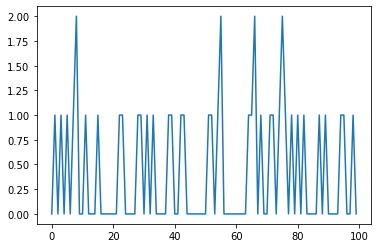

In [110]:
def get_time(cola):
    return cola.get('Minuto')

def duplicates(lst, item):
    return [i for i, x in enumerate(lst) if x == item]

datos = []
vector_cola = []
ocupacion_operador_1 = 0
vector_if = []
promedio_cola = 0

for i in range(0, total_eventos):
    t_l = tiempo_llegada_clientes[i]
    t_o = tiempos_operador_1[i]
    h_s = round(tiempo_llegada_clientes[i] + tiempos_operador_1[i],2)
    ocupacion_operador_1 = ocupacion_operador_1 + t_o

    vector_cola.append({'Minuto': t_l, 'Cliente': i, 'Estado':'Inicio'})
    vector_cola.append({'Minuto': h_s, 'Cliente': i, 'Estado':'Fin'})

#for i in range(0,total_eventos):
#    if vector_cola[i]['Estado'] == 'Inicio':
#        vector_if.append('I')
#    if vector_cola[i]['Estado'] == 'Fin':
#        vector_if.append('F')

#ordenar para luego agregar cola
vector_cola.sort(key=get_time)
cola = -1
cola_array = []
for i in range(0,2*total_eventos):
    if vector_cola[i]['Estado'] == 'Inicio':
        cola = cola+1
        vector_cola[i]['Cola'] = cola
        cola_array.append(cola)
        promedio_cola = cola*vector_cola[i]['Minuto']
    if vector_cola[i]['Estado'] == 'Fin':
        cola = cola-1
    #print(vector_cola[i])

#print(duplicates(vector_if, "F"))

#porcentaje de ocupacion de operador 1
Porcentaje_ocupacion = round((ocupacion_operador_1*100)/(vector_cola[len(vector_cola)-1]['Minuto'] - vector_cola[0]['Minuto']),2)
promedio_cola = round(promedio_cola/(vector_cola[len(vector_cola)-1]['Minuto'] - vector_cola[0]['Minuto']),2)

print(sum(cola_array)/len(cola_array))
print(Porcentaje_ocupacion)
print(promedio_cola )

plt.plot(cola_array)

    


0.47
50.81
0.0


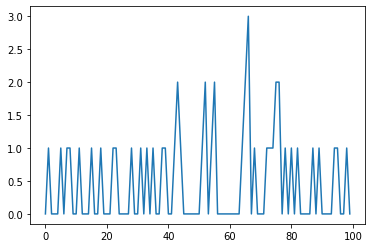

In [111]:
def get_time(cola):
    return cola.get('Minuto')

def duplicates(lst, item):
    return [i for i, x in enumerate(lst) if x == item]

datos = []
vector_cola = []
ocupacion_operador_2 = 0
vector_if = []
promedio_cola = 0

for i in range(0, total_eventos):
    t_l = tiempo_llegada_clientes[i]
    t_o = tiempos_operador_2[i]
    h_s = round(tiempo_llegada_clientes[i] + tiempos_operador_2[i],2)
    ocupacion_operador_2 = ocupacion_operador_2 + t_o

    vector_cola.append({'Minuto': t_l, 'Cliente': i, 'Estado':'Inicio'})
    vector_cola.append({'Minuto': h_s, 'Cliente': i, 'Estado':'Fin'})

#for i in range(0,total_eventos):
#    if vector_cola[i]['Estado'] == 'Inicio':
#        vector_if.append('I')
#    if vector_cola[i]['Estado'] == 'Fin':
#        vector_if.append('F')

#ordenar para luego agregar cola
vector_cola.sort(key=get_time)
cola = -1
cola_array = []
for i in range(0,2*total_eventos):
    if vector_cola[i]['Estado'] == 'Inicio':
        cola = cola+1
        vector_cola[i]['Cola'] = cola
        cola_array.append(cola)
        promedio_cola = cola*vector_cola[i]['Minuto']
    if vector_cola[i]['Estado'] == 'Fin':
        cola = cola-1
    #print(vector_cola[i])

#print(duplicates(vector_if, "F"))

#porcentaje de ocupacion de operador 2
Porcentaje_ocupacion = round((ocupacion_operador_2*100)/(vector_cola[len(vector_cola)-1]['Minuto'] - vector_cola[0]['Minuto']),2)
promedio_cola = round(promedio_cola/(vector_cola[len(vector_cola)-1]['Minuto'] - vector_cola[0]['Minuto']),2)

print(sum(cola_array)/len(cola_array))
print(Porcentaje_ocupacion)
print(promedio_cola )

plt.plot(cola_array)


In [112]:
temp = 0
tiempo_llegada_clientes = []
for i in range(0,total_eventos):
    temp = temp + tiempos_clientes_punta[i] 
    tiempo_llegada_clientes.append(round(temp,2))
print(tiempo_llegada_clientes)

[1.85, 4.03, 5.29, 5.63, 6.27, 7.71, 9.18, 9.18, 11.24, 12.35, 12.5, 13.41, 13.44, 13.85, 14.21, 14.97, 15.05, 16.71, 18.6, 18.73, 18.92, 19.09, 19.47, 21.07, 24.55, 24.86, 25.94, 26.44, 30.88, 31.39, 31.89, 32.13, 33.98, 34.89, 35.29, 35.75, 36.55, 37.51, 38.05, 38.89, 40.36, 40.96, 41.49, 43.43, 44.26, 44.47, 46.32, 46.42, 46.57, 47.37, 49.13, 49.82, 50.8, 53.38, 53.72, 56.81, 58.0, 58.68, 58.94, 59.02, 61.14, 62.85, 63.26, 65.25, 65.96, 66.0, 67.42, 67.58, 67.63, 70.15, 70.97, 72.1, 72.58, 72.68, 73.74, 74.76, 74.86, 76.29, 77.39, 77.79, 78.2, 78.66, 81.12, 81.28, 81.36, 82.15, 82.96, 83.96, 84.61, 85.44, 85.48, 86.38, 86.96, 88.19, 88.25, 93.55, 95.89, 97.91, 97.98, 98.39]


2.59
281.33
1.97


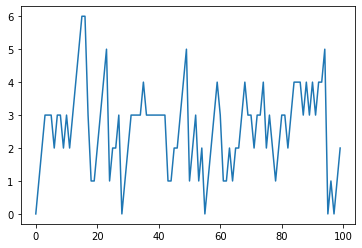

In [113]:
def get_time(cola):
    return cola.get('Minuto')

def duplicates(lst, item):
    return [i for i, x in enumerate(lst) if x == item]

datos = []
vector_cola = []
ocupacion_operador_1 = 0
vector_if = []
promedio_cola = 0

for i in range(0, total_eventos):
    t_l = tiempo_llegada_clientes[i]
    t_o = tiempos_operador_1[i]
    h_s = round(tiempo_llegada_clientes[i] + tiempos_operador_1[i],2)
    ocupacion_operador_1 = ocupacion_operador_1 + t_o

    vector_cola.append({'Minuto': t_l, 'Cliente': i, 'Estado':'Inicio'})
    vector_cola.append({'Minuto': h_s, 'Cliente': i, 'Estado':'Fin'})

#for i in range(0,total_eventos):
#    if vector_cola[i]['Estado'] == 'Inicio':
#        vector_if.append('I')
#    if vector_cola[i]['Estado'] == 'Fin':
#        vector_if.append('F')

#ordenar para luego agregar cola
vector_cola.sort(key=get_time)
cola = -1
cola_array = []
for i in range(0,2*total_eventos):
    if vector_cola[i]['Estado'] == 'Inicio':
        cola = cola+1
        vector_cola[i]['Cola'] = cola
        cola_array.append(cola)
        promedio_cola = cola*vector_cola[i]['Minuto']
    if vector_cola[i]['Estado'] == 'Fin':
        cola = cola-1
    #print(vector_cola[i])

#print(duplicates(vector_if, "F"))

#porcentaje de ocupacion de operador 1
Porcentaje_ocupacion = round((ocupacion_operador_1*100)/(vector_cola[len(vector_cola)-1]['Minuto'] - vector_cola[0]['Minuto']),2)
promedio_cola = round(promedio_cola/(vector_cola[len(vector_cola)-1]['Minuto'] - vector_cola[0]['Minuto']),2)

print(sum(cola_array)/len(cola_array))
print(Porcentaje_ocupacion)
print(promedio_cola )

plt.plot(cola_array)

    

In [ ]:
def get_time(cola):
    return cola.get('Minuto')

def duplicates(lst, item):
    return [i for i, x in enumerate(lst) if x == item]

datos = []
vector_cola = []
ocupacion_operador_2 = 0
vector_if = []
promedio_cola = 0

for i in range(0, total_eventos):
    t_l = tiempo_llegada_clientes[i]
    t_o = tiempos_operador_2[i]
    h_s = round(tiempo_llegada_clientes[i] + tiempos_operador_2[i],2)
    ocupacion_operador_2 = ocupacion_operador_2 + t_o

    vector_cola.append({'Minuto': t_l, 'Cliente': i, 'Estado':'Inicio'})
    vector_cola.append({'Minuto': h_s, 'Cliente': i, 'Estado':'Fin'})

#for i in range(0,total_eventos):
#    if vector_cola[i]['Estado'] == 'Inicio':
#        vector_if.append('I')
#    if vector_cola[i]['Estado'] == 'Fin':
#        vector_if.append('F')

#ordenar para luego agregar cola
vector_cola.sort(key=get_time)
cola = -1
cola_array = []
for i in range(0,2*total_eventos):
    if vector_cola[i]['Estado'] == 'Inicio':
        cola = cola+1
        vector_cola[i]['Cola'] = cola
        cola_array.append(cola)
        promedio_cola = cola*vector_cola[i]['Minuto']
    if vector_cola[i]['Estado'] == 'Fin':
        cola = cola-1
    #print(vector_cola[i])

#print(duplicates(vector_if, "F"))

#porcentaje de ocupacion de operador 2
Porcentaje_ocupacion = round((ocupacion_operador_2*100)/(vector_cola[len(vector_cola)-1]['Minuto'] - vector_cola[0]['Minuto']),2)
promedio_cola = round(promedio_cola/(vector_cola[len(vector_cola)-1]['Minuto'] - vector_cola[0]['Minuto']),2)

print(sum(cola_array)/len(cola_array))
print(Porcentaje_ocupacion)
print(promedio_cola )

plt.plot(cola_array)